In [1]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

In [2]:
source('../gene_table_and_other_scripts/theme_Publication.R')

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont().

Georgia already regist

In [3]:
# Clean ADR1 Vector Plot Code
# Load required libraries
library(tidyverse)
library(ggplot2)
library(ggrepel)
# Load and prepare data
Res_merged <- readRDS("generated_data/Res_merged.rds")

# Change MEcyan to MEruby and fix source names
Res_merged <- Res_merged %>%
  mutate(across(c(module, Module_n), ~gsub("MEcyan", "MEruby", .)))
levels(Res_merged$source) <- gsub("/", "-", levels(Res_merged$source))

# Calculate median log2FC by source and module
df_median <- Res_merged %>%
  group_by(source, module) %>%
  summarise(l2fc_median = median(log2FC, na.rm = TRUE), .groups = 'drop') %>%
  spread(module, l2fc_median)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ dplyr::combine()    masks gridExtra::combine()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# Load required libraries
library(tidyverse)
library(ggplot2)
library(ggrepel)

# Load and prepare data
Res_merged <- readRDS("generated_data/Res_merged.rds")

# Change MEcyan to MEruby and fix source names
Res_merged <- Res_merged %>%
  mutate(across(c(module, Module_n), ~gsub("MEcyan", "MEruby", .)))
levels(Res_merged$source) <- gsub("/", "-", levels(Res_merged$source))

# Calculate median log2FC by source and module
df_median <- Res_merged %>%
  group_by(source, module) %>%
  summarise(l2fc_median = median(log2FC, na.rm = TRUE), .groups = 'drop') %>%
  spread(module, l2fc_median)

# Add classifications to df_plot
df_plot <- df_median %>%
  mutate(
    # Data source classification
    data_source = case_when(
      str_detect(source, "^AvrRpt2-|^AvrRps4-|^DM1-DM2d|^DM6-DM7|^DM10-DM11|_adr1s$") ~ "Our data",
      TRUE ~ "Published data"
    ),
    
    # Immune type classification
    immune_type = case_when(
      str_detect(source, "Rpt|Rpm|Rps") ~ "infection",
      TRUE ~ "autoimmune"
    ),
    
    # Fine immune type classification for coloring
    fine_immune_type = case_when(
      # Group AvrRps4 timepoints
      str_detect(source, "^AvrRps4-") ~ "AvrRps4",
      # Group AvrRpt2 timepoints  
      str_detect(source, "^AvrRpt2-") ~ "AvrRpt2",
      # Group ssi2 variants
      str_detect(source, "^ssi2-") ~ "ssi2",
      # Group Saile samples
      str_detect(source, "^Saile_") ~ "Saile",
      # Keep individual names for others
      TRUE ~ as.character(source)
    ),
    
    # Combined shape classification
    shape_category = paste(data_source, immune_type, sep = "_")
  )

# Define custom colors (unchanged)
custom_colors_grouped <- c(
  # Your experimental data colors
  "DM6-DM7" = "#F8766D",
  "DM1-DM2d" = "#BC7FB7", 
  "DM10-DM11" = "#A58AFF",
  "DM6-DM7_adr1s" = "#568FE8",
  "DM1-DM2d_adr1s" = "#1132A9",
  "Col-0_adr1s" = "#2A6EDB",
  
  # Grouped experimental data
  "AvrRps4" = "#a884ba",
  "AvrRpt2" = "#f09f67",
  
  # Published data colors
  "ssi2" = "#f4511e",
  "acd6_9am" = "#EDC5BF",
  "bak1serk4" = "#d50000",
  "hos15" = "#ff6e40",
  "ka120" = "#ff3d00",
  "Est_R4_4h" = "#dd2c00",
  "dm2h_NIL" = "#bf360c",
  "sulki" = "#ff8a65",
  "Saile" = "#00A9FF"
)

# Define new shape mapping based on data source and immune type
shape_mapping <- c(
  "Our data_autoimmune" = 16,      # solid circle
  "Published data_autoimmune" = 1, # open circle
  "Our data_infection" = 18,       # solid diamond
  "Published data_infection" = 5   # open diamond
)

# Create directory for plots
dir.create("plots", showWarnings = FALSE)

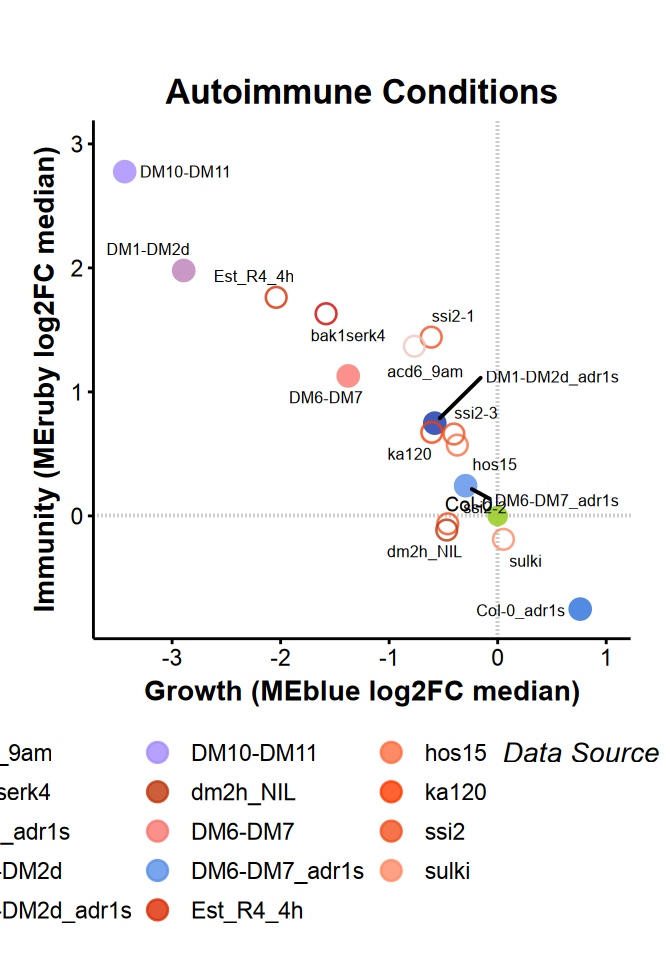

In [5]:
# === AUTOIMMUNE PLOT ===
width_auto <- 3.35
height_auto <- 4.9

options(repr.plot.width= width_auto, repr.plot.height= height_auto, repr.plot.res = 200)

df_autoimmune <- df_plot %>% 
  filter(immune_type == 'autoimmune')

p_autoimmune <- ggplot(df_autoimmune, aes(y = MEruby, x = MEblue)) +
  # Reference lines
  geom_vline(xintercept = 0, linetype = "dotted", color = "grey60") + 
  geom_hline(yintercept = 0, linetype = "dotted", color = "grey60") +
  
  # Main points with new shape distinction and adjusted size for open shapes
  geom_point(aes(color = fine_immune_type, shape = shape_category, 
                 size = ifelse(shape_category == "Published data_autoimmune", 3, 3.5)), 
             alpha = 0.8) +
  scale_size_identity() +
  
  # Col-0 reference point at origin (using data frame method)
  geom_point(data = data.frame(x = 0, y = 0), 
             aes(x = x, y = y), 
             size = 3, shape = 16, color = "#9ccf2d", alpha = 0.9) +
  
  # Ideal plant marker
  geom_point(x = 2.5, y = 0.5, size = 3, shape = 8, color = "black", alpha = 1) +
  
  # Labels
  geom_text_repel(aes(label = source), size = 2, max.overlaps = Inf,
                  box.padding = 0.3, point.padding = 0.2) +
  
  # Col-0 label
  geom_text(data = data.frame(x = 0, y = 0, label = "Col-0"),
            aes(x = x, y = y, label = label),
            size = 2.5, hjust = 1.1, vjust = -0.3, color = "black") +
  
  # Scales and styling
  scale_color_manual(values = custom_colors_grouped, name = "Sample Type") +
  scale_shape_manual(values = shape_mapping, name = "Data Source",
                     labels = c("Our data_autoimmune" = "Our data",
                               "Published data_autoimmune" = "Published data")) +
  
  labs(x = "Growth (MEblue log2FC median)",
       y = "Immunity (MEruby log2FC median)",
       title = "Autoimmune Conditions") +
  
  coord_cartesian(xlim = c(-3.5, 1), ylim = c(-0.8, 3)) +
  
  # Theme
  theme_bw() + theme_Publication()+
  theme(
    legend.position = "bottom",
    legend.title = element_text(size = 10),
    legend.text = element_text(size = 8),
    axis.text = element_text(size = 8),
    axis.title = element_text(size = 10),
    plot.title = element_text(size = 12, hjust = 0.5)
  ) +
  
  # Legend formatting
  guides(
    color = guide_legend(override.aes = list(size = 3), ncol = 3, order = 1),
    shape = guide_legend(override.aes = list(size = 3), ncol = 2, order = 2)
  )

# Display and save autoimmune plot
print(p_autoimmune)
ggsave("plots/fig_autoimmune_custom_shapes.pdf", p_autoimmune, 
       width = width_auto, height = height_auto, units = "in")

Time series connections added with clean labels:
- Rpm1: 30m -> 4h -> 8h
- Rpt2: 30m -> 4h -> 8h
- Rps4: 30m -> 4h -> 8h
- AvrRpt2: 6h -> 12h -> 20h
- AvrRps4: 6h -> 12h -> 20h
- 'Saile_' prefix removed from labels
- Arrows show temporal progression in black
- Files saved to plots/ directory


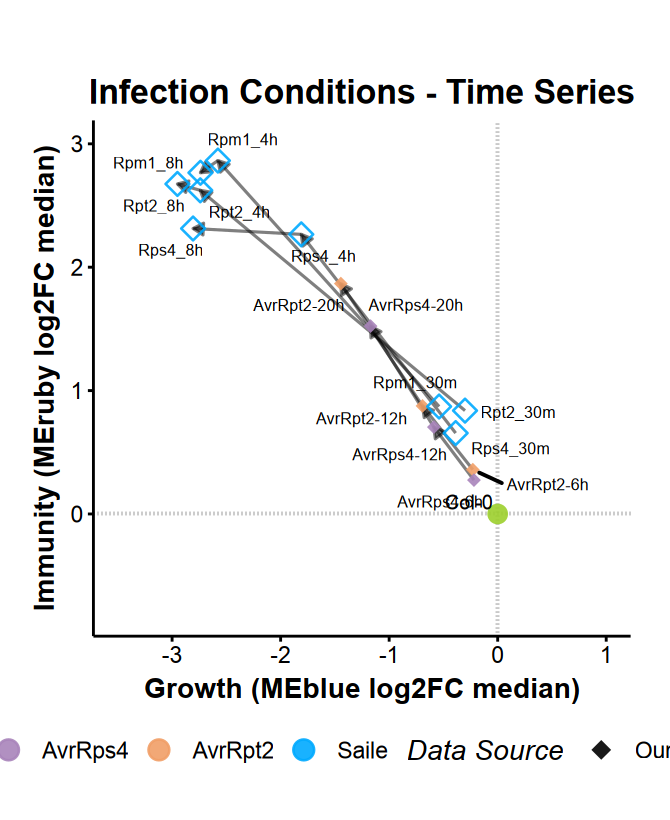

In [6]:
df_infection <- df_plot %>% 
  filter(immune_type == 'infection')

# Continuation from existing code - creating infection plot with time series segments
# Clean version with "Saile_" prefix removed from labels

# Create time series connections for Saile data
create_timeseries_segments <- function(df, pattern, timepoints) {
  segments_data <- tibble()
  
  for (i in 1:(length(timepoints) - 1)) {
    from_point <- df %>% filter(str_detect(source, paste0(pattern, timepoints[i])))
    to_point <- df %>% filter(str_detect(source, paste0(pattern, timepoints[i + 1])))
    
    if (nrow(from_point) > 0 && nrow(to_point) > 0) {
      segments_data <- bind_rows(segments_data, 
                                tibble(
                                  x = from_point$MEblue,
                                  y = from_point$MEruby,
                                  xend = to_point$MEblue,
                                  yend = to_point$MEruby,
                                  series = pattern
                                ))
    }
  }
  return(segments_data)
}

# Define time series for each effector
rpm1_timepoints <- c("30m", "4h", "8h")
rpt2_timepoints <- c("30m", "4h", "8h")
rps4_timepoints <- c("30m", "4h", "8h")
avrrpt2_timepoints <- c("6h", "12h", "20h")
avrrps4_timepoints <- c("6h", "12h", "20h")

# Create segments for each time series
saile_rpm1_segments <- create_timeseries_segments(df_infection, "Saile_Rpm1_", rpm1_timepoints)
saile_rpt2_segments <- create_timeseries_segments(df_infection, "Saile_Rpt2_", rpt2_timepoints)
saile_rps4_segments <- create_timeseries_segments(df_infection, "Saile_Rps4_", rps4_timepoints)
avrrpt2_segments <- create_timeseries_segments(df_infection, "AvrRpt2-", avrrpt2_timepoints)
avrrps4_segments <- create_timeseries_segments(df_infection, "AvrRps4-", avrrps4_timepoints)

# Combine all segments
all_segments <- bind_rows(
  saile_rpm1_segments,
  saile_rpt2_segments,
  saile_rps4_segments,
  avrrpt2_segments,
  avrrps4_segments
)

# Define colors for time series lines
timeseries_colors <- c(
  "Saile_Rpm1_" = "#00A9FF",
  "Saile_Rpt2_" = "#00A9FF", 
  "Saile_Rps4_" = "#00A9FF",
  "AvrRpt2-" = "#f09f67",
  "AvrRps4-" = "#a884ba"
)

# Create clean version of df_infection with "Saile_" removed
df_infection_clean <- df_infection %>%
  mutate(source_clean = str_remove(source, "^Saile_"))

# === INFECTION PLOT WITH TIME SERIES - CLEAN LABELS ===
width_inf <- 3.35
height_inf <- 4.1
options(repr.plot.width = width_inf, repr.plot.height = height_inf, repr.plot.res = 200)

p_infection_timeseries_clean <- ggplot(df_infection_clean, aes(y = MEruby, x = MEblue)) +
  # Reference lines
  geom_vline(xintercept = 0, linetype = "dotted", color = "grey60") + 
  geom_hline(yintercept = 0, linetype = "dotted", color = "grey60") +
  
  # Time series segments (behind points) - using black color
  geom_segment(data = all_segments,
               aes(x = x, y = y, xend = xend, yend = yend),
               linewidth = 0.4, alpha = 0.5, color = "black",
               arrow = arrow(length = unit(0.15, "cm"), type = "closed")) +
  
  # Main points with shape distinction and adjusted size for open shapes
  geom_point(aes(color = fine_immune_type, shape = shape_category,
                 size = ifelse(shape_category == "Published data_infection", 2.5, 2.0)), 
             alpha = 0.9) +
  scale_size_identity() +
  
  # Col-0 reference point at origin
  geom_point(data = data.frame(x = 0, y = 0), 
             aes(x = x, y = y), 
             size = 3, shape = 16, color = "#9ccf2d", alpha = 0.9) +
  
  # Ideal plant marker
  geom_point(x = 2.5, y = 0.5, size = 5, shape = 8, color = "black", alpha = 1) +
  
  # Labels with clean names (Saile_ removed)
  geom_text_repel(aes(label = source_clean), size = 2, max.overlaps = Inf,
                  box.padding = 0.3, point.padding = 0.2) +
  
  # Col-0 label
  geom_text(data = data.frame(x = 0, y = 0, label = "Col-0"),
            aes(x = x, y = y, label = label),
            size = 2.5, hjust = 1.1, vjust = -0.3, color = "black") +
  
  # Scales and styling
  scale_color_manual(values = c(custom_colors_grouped, timeseries_colors), 
                     name = "Sample Type") +
  scale_shape_manual(values = shape_mapping, name = "Data Source",
                     labels = c("Our data_infection" = "Our data",
                               "Published data_infection" = "Published data")) +
  
  labs(x = "Growth (MEblue log2FC median)",
       y = "Immunity (MEruby log2FC median)",
       title = "Infection Conditions - Time Series") +
  
  coord_cartesian(xlim = c(-3.5, 1), ylim = c(-0.8, 3)) +
  
  # Theme
  theme_bw() + theme_Publication() +
  theme(
    legend.position = "bottom",
    legend.title = element_text(size = 10),
    legend.text = element_text(size = 8),
    axis.text = element_text(size = 8),
    axis.title = element_text(size = 10),
    plot.title = element_text(size = 12, hjust = 0.5)
  ) +
  
  # Legend formatting
  guides(
    color = guide_legend(override.aes = list(size = 3, linetype = 0), ncol = 3, order = 1),
    shape = guide_legend(override.aes = list(size = 3), ncol = 2, order = 2)
  )

# Display and save infection timeseries plot with clean labels
print(p_infection_timeseries_clean)
ggsave("plots/fig_infection_timeseries_clean.pdf", p_infection_timeseries_clean, 
       width = width_inf, height = height_inf, units = "in")
ggsave("plots/fig_infection_timeseries_clean.png", p_infection_timeseries_clean, 
       width = width_inf, height = height_inf, units = "in", dpi = 300)

# Print summary of time series connections
cat("Time series connections added with clean labels:\n")
cat("- Rpm1: 30m -> 4h -> 8h\n")
cat("- Rpt2: 30m -> 4h -> 8h\n") 
cat("- Rps4: 30m -> 4h -> 8h\n")
cat("- AvrRpt2: 6h -> 12h -> 20h\n")
cat("- AvrRps4: 6h -> 12h -> 20h\n")
cat("- 'Saile_' prefix removed from labels\n")
cat("- Arrows show temporal progression in black\n")
cat("- Files saved to plots/ directory\n")

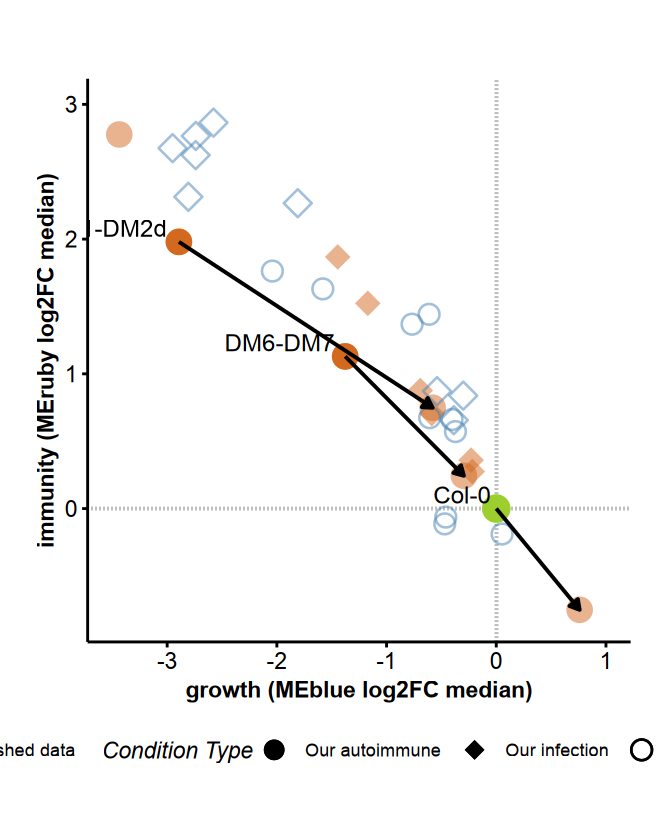

In [7]:
# Add classifications to df_plot
df_plot <- df_median %>%
  mutate(
    # Data source classification
    data_source = case_when(
      str_detect(source, "^AvrRpt2-|^AvrRps4-|^DM1-DM2d|^DM6-DM7|^DM10-DM11|_adr1s$") ~ "Our data",
      TRUE ~ "Published data"
    ),
    
    # Immune type classification
    immune_type = case_when(
      str_detect(source, "Rpt|Rpm|Rps") ~ "infection",
      TRUE ~ "autoimmune"
    ),
    
    # Fine immune type classification for coloring
    fine_immune_type = case_when(
      # Group AvrRps4 timepoints
      str_detect(source, "^AvrRps4-") ~ "AvrRps4",
      # Group AvrRpt2 timepoints  
      str_detect(source, "^AvrRpt2-") ~ "AvrRpt2",
      # Group ssi2 variants
      str_detect(source, "^ssi2-") ~ "ssi2",
      # Group Saile samples
      str_detect(source, "^Saile_") ~ "Saile",
      # Keep individual names for others
      TRUE ~ as.character(source)
    ),
    
    # Combined shape classification
    shape_category = paste(data_source, immune_type, sep = "_")
  )

# Define shape mapping based on data source and immune type
# "our data" + autoimmunity = solid circle (16)
# "published data" + autoimmunity = open circle (1) 
# "our data" + infection = solid diamond (18)
# "published data" + infection = open diamond (5)
shape_mapping <- c(
  "Our data_autoimmune" = 16,      # solid circle
  "Published data_autoimmune" = 1, # open circle
  "Our data_infection" = 18,       # solid diamond
  "Published data_infection" = 5   # open diamond
)

# Create ADR1 vector pairs manually
adr1_vectors <- tibble(
  wt_name = c("DM1-DM2d", "DM6-DM7", "Col-0"),
  ko_name = c("DM1-DM2d_adr1s", "DM6-DM7_adr1s", "Col-0_adr1s")
)

# Get coordinates for vector plot
vector_data <- map_dfr(1:nrow(adr1_vectors), function(i) {
  wt_data <- df_plot %>% filter(source == adr1_vectors$wt_name[i])
  ko_data <- df_plot %>% filter(source == adr1_vectors$ko_name[i])
  
  # Handle Col-0 as origin (0,0) since it's not real data
  if(adr1_vectors$wt_name[i] == "Col-0") {
    tibble(
      wt_name = "Col-0",
      ko_name = "Col-0_adr1s",
      x_start = 0,
      y_start = 0,
      x_end = ko_data$MEblue,
      y_end = ko_data$MEruby,
      data_source = "Our data"
    )
  } else {
    tibble(
      wt_name = adr1_vectors$wt_name[i],
      ko_name = adr1_vectors$ko_name[i],
      x_start = wt_data$MEblue,
      y_start = wt_data$MEruby,
      x_end = ko_data$MEblue,
      y_end = ko_data$MEruby,
      data_source = wt_data$data_source
    )
  }
})

# Define colors for ADR1 plot
colors <- c("Our data" = "#D2691E", "Published data" = "#4682B4")

# Create directory for plots
dir.create("plots", showWarnings = FALSE)

width_ <- 4.5
height_ <- 4.5

# Create the ADR1 vector plot with updated shapes
p_adr1 <- ggplot() +
  # Grid lines
  geom_vline(xintercept = 0, lty = 3, color = "gray50") + 
  geom_hline(yintercept = 0, lty = 3, color = "gray50") +
  
  # Background points (all data, faded) with new shape system
  # Published data gets larger size to compensate for open shapes
  geom_point(data = df_plot, 
             aes(x = MEblue, y = MEruby, 
                 color = data_source, 
                 shape = shape_category,
                 size = ifelse(str_detect(shape_category, "Published"), 3, 4)),
             alpha = 0.5) +
  scale_size_identity() +
  
  # Highlighted wild-type points
  geom_point(data = df_plot %>% filter(source %in% c("DM1-DM2d", "DM6-DM7")),
             aes(x = MEblue, y = MEruby, 
                 color = data_source, 
                 shape = shape_category),
             size = 4) +
  
  # Col-0 reference point at origin
  geom_point(data = data.frame(x = 0, y = 0), 
             aes(x = x, y = y), 
             size = 4, shape = 16, color = "#9CCF2D", stroke = 1) +
  
  # Vector arrows
  geom_segment(data = vector_data,
               aes(x = x_start, y = y_start, 
                   xend = x_end, yend = y_end),
               arrow = arrow(length = unit(0.02, "npc"), type = "closed"),
               color = "black", linewidth = 0.5) +
  
  # Labels (with origin point debugging)
  geom_text(data = vector_data %>% filter(wt_name != "Col-0"),
            aes(x = x_start, y = y_start, label = wt_name),
            size = 3, hjust = 1.1, vjust = -0.3) +
  
  # Make sure Col-0 label is visible
  geom_text(data = data.frame(x = 0, y = 0, label = "Col-0"),
            aes(x = x, y = y, label = label),
            size = 3, hjust = 1.1, vjust = -0.3, color = "black") +
  
  # Scales and theme
  scale_color_manual(values = colors, name = "Data Source") +
  scale_shape_manual(values = shape_mapping, name = "Condition Type",
                     labels = c("Our data_autoimmune" = "Our autoimmune", 
                               "Published data_autoimmune" = "Published autoimmune",
                               "Our data_infection" = "Our infection",
                               "Published data_infection" = "Published infection")) +
  
  labs(
    x = "growth (MEblue log2FC median)",
    y = "immunity (MEruby log2FC median)"
  ) +
  
  xlim(-3.5, 1) +
  ylim(-0.8, 3) +
  
  theme_bw() + theme_Publication()+
  theme(
    legend.position = "bottom",
    axis.text = element_text(size = 8),
    axis.title = element_text(size = 8),
    text = element_text(size = 8)
  ) + 
  
  guides(
    color = guide_legend(override.aes = list(alpha = 1, size = 3), order = 1),
    shape = guide_legend(override.aes = list(alpha = 1, size = 3), order = 2)
  )

print(p_adr1)
ggsave("plots/fig_adr1_vector_corrected_shapes.pdf", p_adr1, h = height_, w = width_)


### Simplified for COPB

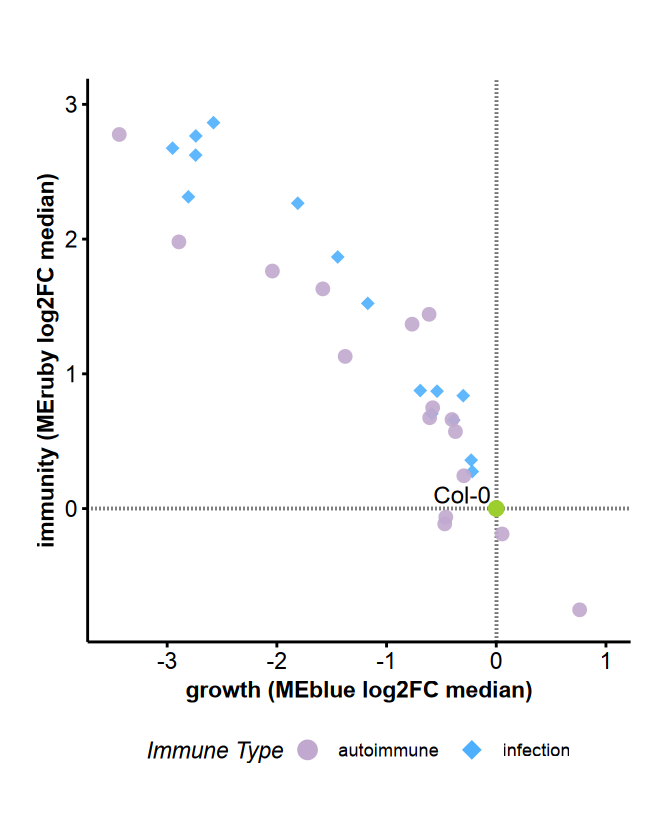

In [31]:
# Add classifications to df_plot
df_plot <- df_median %>%
  mutate(
    # Immune type classification
    immune_type = case_when(
      str_detect(source, "Rpt|Rpm|Rps") ~ "infection",
      TRUE ~ "autoimmune"
    )
  )

# Define shape mapping based on immune type
# autoimmune = filled circle (16)
# infection = filled diamond (18)
shape_mapping <- c(
  "autoimmune" = 16,  # filled circle
  "infection" = 18    # filled diamond
)

# Define colors
colors <- c("autoimmune" = "#C1A8CE", "infection" = "#4EAFFC")

# Create directory for plots
dir.create("plots", showWarnings = FALSE)

width_ <- 4.4
height_ <- 4.6

# Create the simplified plot with alpha
p_simplified_alpha <- ggplot() +
  # Grid lines
  geom_vline(xintercept = 0, lty = 3, color = "black") + 
  geom_hline(yintercept = 0, lty = 3, color = "black") +
  
  # All data points with alpha
  geom_point(data = df_plot, 
             aes(x = MEblue, y = MEruby, 
                 color = immune_type, 
                 shape = immune_type),
             size = 2, alpha = 0.9) +
  
  # Col-0 reference point at origin
  geom_point(data = data.frame(x = 0, y = 0), 
             aes(x = x, y = y), 
             size = 2, shape = 16, color = "#9CCF2D", stroke = 1) +
  
  # Col-0 label
  geom_text(data = data.frame(x = 0, y = 0, label = "Col-0"),
            aes(x = x, y = y, label = label),
            size = 3, hjust = 1.1, vjust = -0.3, color = "black") +
  
  # Scales and theme
  scale_color_manual(values = colors, name = "Immune Type") +
  scale_shape_manual(values = shape_mapping, name = "Immune Type") +
  
  labs(
    x = "growth (MEblue log2FC median)",
    y = "immunity (MEruby log2FC median)"
  ) +
  
  xlim(-3.5, 1) +
  ylim(-0.8, 3) +
  
  theme_bw() + theme_Publication() +
  theme(
    legend.position = "bottom",
    axis.text = element_text(size = 8),
    axis.title = element_text(size = 8),
    text = element_text(size = 8)
  ) + 
  
  guides(
    color = guide_legend(override.aes = list(size = 3, alpha = 1))
  )

print(p_simplified_alpha)
ggsave("plots/fig_simplified_plot_alpha.pdf", p_simplified_alpha, h = height_, w = width_)

In [8]:
# Add classifications to df_plot and restore original values
df_plot <- df_median %>%
  mutate(
    # Restore original values from log2 transformation
    MEblue_original = 2^MEblue,
    MEruby_original = 2^MEruby,
    
    # Data source classification
    data_source = case_when(
      str_detect(source, "^AvrRpt2-|^AvrRps4-|^DM1-DM2d|^DM6-DM7|^DM10-DM11|_adr1s$") ~ "Our data",
      TRUE ~ "Published data"
    ),
    
    # Immune type classification
    immune_type = case_when(
      str_detect(source, "Rpt|Rpm|Rps") ~ "infection",
      TRUE ~ "autoimmune"
    ),
    
    # Fine immune type classification for coloring
    fine_immune_type = case_when(
      # Group AvrRps4 timepoints
      str_detect(source, "^AvrRps4-") ~ "AvrRps4",
      # Group AvrRpt2 timepoints  
      str_detect(source, "^AvrRpt2-") ~ "AvrRpt2",
      # Group ssi2 variants
      str_detect(source, "^ssi2-") ~ "ssi2",
      # Group Saile samples
      str_detect(source, "^Saile_") ~ "Saile",
      # Keep individual names for others
      TRUE ~ as.character(source)
    ),
    
    # Combined shape classification
    shape_category = paste(data_source, immune_type, sep = "_")
  )
df_plot

source,MEblue,MEdarkgreen,MEdarkred,MEdarkturquoise,MEgreenyellow,MEmidnightblue,MEpurple,MEruby,MEsalmon,MEtan,MEblue_original,MEruby_original,data_source,immune_type,fine_immune_type,shape_category
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
AvrRpt2-6h,-0.22918047,-0.23484528,0.51173635,-0.03576113,0.056401742,-0.350969881,-0.21922454,0.35916235,-0.06741936,-0.05537424,0.85311937,1.2826809,Our data,infection,AvrRpt2,Our data_infection
AvrRpt2-12h,-0.69273255,-0.41152038,2.03342954,-0.34438497,-0.030190799,-0.455626180,-0.73516082,0.87579702,0.10552481,-0.03079396,0.61868092,1.8350216,Our data,infection,AvrRpt2,Our data_infection
AvrRpt2-20h,-1.44526934,-0.49799597,2.19416973,-1.14004720,-0.176859341,-0.292889990,-0.94013929,1.86719812,0.48221135,0.73083644,0.36722359,3.6482336,Our data,infection,AvrRpt2,Our data_infection
AvrRps4-6h,-0.21875295,-0.24546620,0.40975206,0.04687279,0.006510479,-0.315481406,-0.17789835,0.27468172,-0.07318429,-0.12991583,0.85930789,1.2097272,Our data,infection,AvrRps4,Our data_infection
AvrRps4-12h,-0.58811094,-0.48425043,2.48420674,-0.42082104,-0.001505532,-0.564104590,-0.59659085,0.70424473,0.08276993,-0.13778922,0.66521337,1.6292915,Our data,infection,AvrRps4,Our data_infection
AvrRps4-20h,-1.17147841,-0.42193111,2.65947022,-1.03137133,-0.268458729,-0.327879597,-0.70271261,1.52275950,0.42779356,0.56751931,0.44396615,2.8734013,Our data,infection,AvrRps4,Our data_infection
DM10-DM11,-3.43678686,0.57547242,-1.94903792,-0.60427277,-0.419240423,3.199426029,-1.63953143,2.77640249,1.08285194,0.30360519,0.09234727,6.8514175,Our data,autoimmune,DM10-DM11,Our data_autoimmune
DM1-DM2d,-2.89307318,0.97083040,-2.29921990,-1.04963247,-0.876638392,2.021008763,-1.28343965,1.97915411,1.58210931,-0.50360786,0.13461647,3.9426185,Our data,autoimmune,DM1-DM2d,Our data_autoimmune
DM6-DM7,-1.37718795,0.37468194,-1.71718216,-0.56153211,0.062737365,1.612620884,-0.90575959,1.12913986,1.50903285,0.27115647,0.38496843,2.1872829,Our data,autoimmune,DM6-DM7,Our data_autoimmune


In [9]:
log2(1.2826809)

[1] 0.3591623

In [10]:
# Define shape mapping based on data source and immune type
# "our data" + autoimmunity = solid circle (16)
# "published data" + autoimmunity = open circle (1) 
# "our data" + infection = solid diamond (18)
# "published data" + infection = open diamond (5)
shape_mapping <- c(
  "Our data_autoimmune" = 16,      # solid circle
  "Published data_autoimmune" = 1, # open circle
  "Our data_infection" = 18,       # solid diamond
  "Published data_infection" = 5   # open diamond
)

# Create ADR1 vector pairs manually
adr1_vectors <- tibble(
  wt_name = c("DM1-DM2d", "DM6-DM7", "Col-0"),
  ko_name = c("DM1-DM2d_adr1s", "DM6-DM7_adr1s", "Col-0_adr1s")
)

# Get coordinates for vector plot using original values
vector_data <- map_dfr(1:nrow(adr1_vectors), function(i) {
  wt_data <- df_plot %>% filter(source == adr1_vectors$wt_name[i])
  ko_data <- df_plot %>% filter(source == adr1_vectors$ko_name[i])
  
  # Handle Col-0 as origin (1,1) since original values at 0 log2FC = 2^0 = 1
  if(adr1_vectors$wt_name[i] == "Col-0") {
    tibble(
      wt_name = "Col-0",
      ko_name = "Col-0_adr1s",
      x_start = 1,  # 2^0 = 1
      y_start = 1,  # 2^0 = 1
      x_end = ko_data$MEblue_original,
      y_end = ko_data$MEruby_original,
      data_source = "Our data"
    )
  } else {
    tibble(
      wt_name = adr1_vectors$wt_name[i],
      ko_name = adr1_vectors$ko_name[i],
      x_start = wt_data$MEblue_original,
      y_start = wt_data$MEruby_original,
      x_end = ko_data$MEblue_original,
      y_end = ko_data$MEruby_original,
      data_source = wt_data$data_source
    )
  }
})

# Define colors for ADR1 plot
colors <- c("Our data" = "#D2691E", "Published data" = "#4682B4")



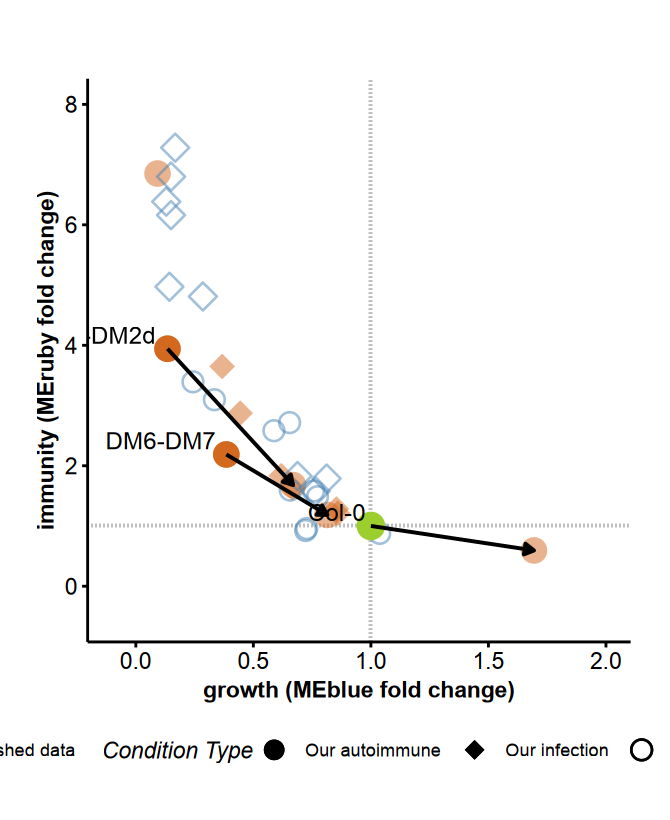

In [11]:
p_adr1_fixed <- ggplot() +
  # Grid lines at reference point (1,1)
  geom_vline(xintercept = 1, lty = 3, color = "gray50") + 
  geom_hline(yintercept = 1, lty = 3, color = "gray50") +
  
  # Background points (all data, faded) with new shape system using original values
  # Published data gets larger size to compensate for open shapes
  geom_point(data = df_plot, 
             aes(x = MEblue_original, y = MEruby_original, 
                 color = data_source, 
                 shape = shape_category,
                 size = ifelse(str_detect(shape_category, "Published"), 3, 4)),
             alpha = 0.5) +
  scale_size_identity() +
  
  # Highlighted wild-type points
  geom_point(data = df_plot %>% filter(source %in% c("DM1-DM2d", "DM6-DM7")),
             aes(x = MEblue_original, y = MEruby_original, 
                 color = data_source, 
                 shape = shape_category),
             size = 4) +
  
  # Col-0 reference point at (1,1)
  geom_point(data = data.frame(x = 1, y = 1), 
             aes(x = x, y = y), 
             size = 4, shape = 16, color = "#9CCF2D", stroke = 1) +
  
  # Vector arrows
  geom_segment(data = vector_data,
               aes(x = x_start, y = y_start, 
                   xend = x_end, yend = y_end),
               arrow = arrow(length = unit(0.02, "npc"), type = "closed"),
               color = "black", linewidth = 0.5) +
  
  # Labels (with origin point debugging)
  geom_text(data = vector_data %>% filter(wt_name != "Col-0"),
            aes(x = x_start, y = y_start, label = wt_name),
            size = 3, hjust = 1.1, vjust = -0.3) +
  
  # Make sure Col-0 label is visible
  geom_text(data = data.frame(x = 1, y = 1, label = "Col-0"),
            aes(x = x, y = y, label = label),
            size = 3, hjust = 1.1, vjust = -0.3, color = "black") +
  
  # Scales and theme
  scale_color_manual(values = colors, name = "Data Source") +
  scale_shape_manual(values = shape_mapping, name = "Condition Type",
                     labels = c("Our data_autoimmune" = "Our autoimmune", 
                               "Published data_autoimmune" = "Published autoimmune",
                               "Our data_infection" = "Our infection",
                               "Published data_infection" = "Published infection")) +
  
  # Fixed axis limits from 1 to 5
  xlim(-0.1, 2) +
  ylim(-0.5, 8) +
  
  labs(
    x = "growth (MEblue fold change)",
    y = "immunity (MEruby fold change)"
  ) +
  
  theme_bw() + theme_Publication()+
  theme(
    legend.position = "bottom",
    axis.text = element_text(size = 8),
    axis.title = element_text(size = 8),
    text = element_text(size = 8)
  ) + 
  
  guides(
    color = guide_legend(override.aes = list(alpha = 1, size = 3), order = 1),
    shape = guide_legend(override.aes = list(alpha = 1, size = 3), order = 2)
  )

print(p_adr1_fixed)
ggsave("plots/fig_adr1_vector_fixed_limits.pdf", p_adr1_fixed, h = height_, w = width_)

# Print 